In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Problem Statement**:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset [Kyphosis](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv)

INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUT:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation


In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")

In [27]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


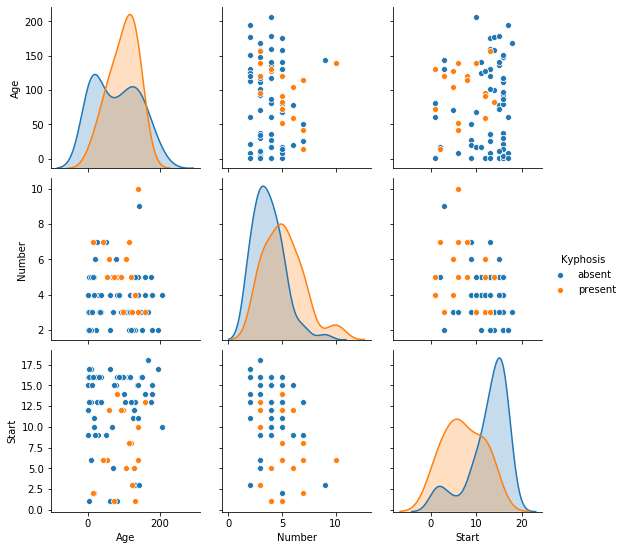

In [28]:
sns.pairplot(df,hue='Kyphosis')

In [29]:
## splitting the dataset into input and output
X = df.drop('Kyphosis', axis=1)
y = df.Kyphosis

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 3)
(17, 3)
(64,)
(17,)


In [32]:
# Apply the decision tree algorithm 
from sklearn.tree import DecisionTreeClassifier
# create an object
dtree = DecisionTreeClassifier(criterion='entropy')
# Applying the classifier to the dataset
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [35]:
confusion_matrix(y_train,y_train_pred)

array([[51,  0],
       [ 0, 13]])

In [36]:
## predicting the testdata
y_test_pred = dtree.predict(X_test)
y_test_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent'], dtype=object)

In [37]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



In [38]:
# Visualisation of the decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')


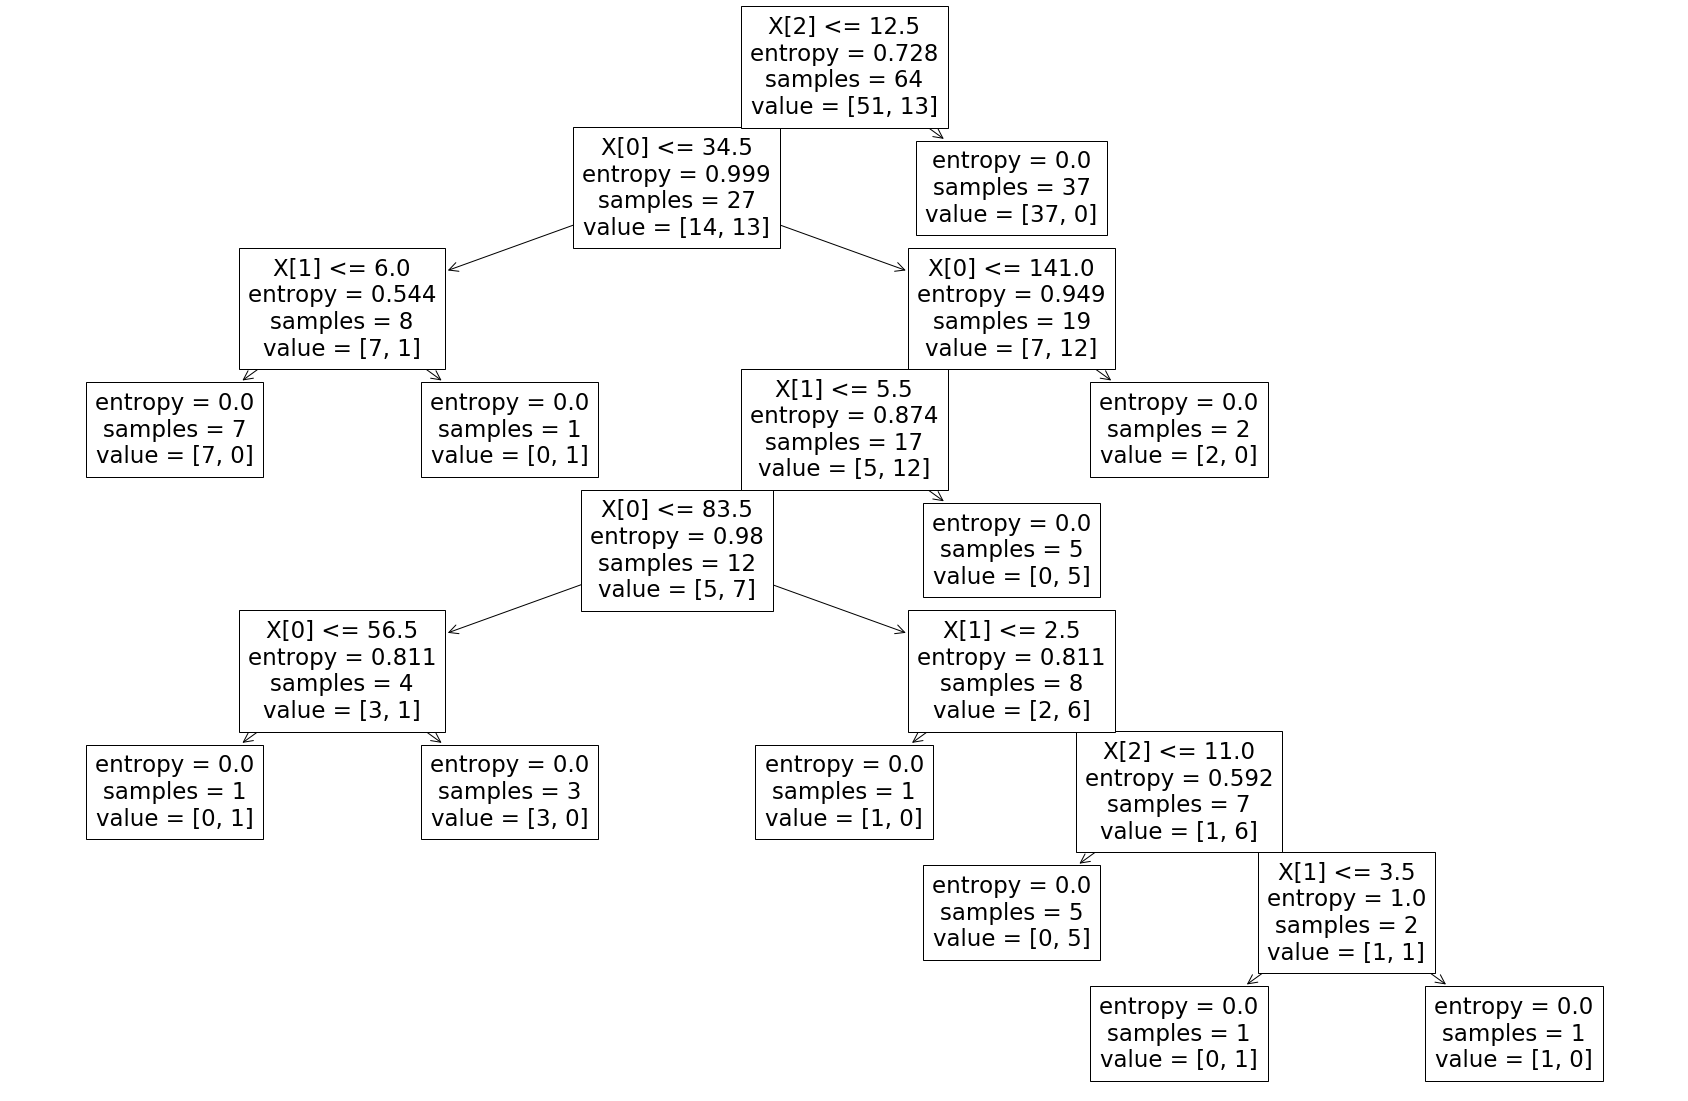

In [39]:
plt.figure(figsize=(30,20))
tree.plot_tree(dtree)
plt.show()

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=5)

array([0.84615385, 0.92307692, 0.92307692, 0.76923077, 0.75      ])

In [41]:
## Hyperparameters
grid_param = {'criterion':['gini','entropy'],
             'max_depth': range(2,10,1),
             'min_samples_leaf' : range(1,10,1)}


In [42]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=grid_param)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
             

In [43]:
# returns the optimal parameters.
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 9}

In [44]:
# Apply the decision tree algorithm 
from sklearn.tree import DecisionTreeClassifier
# create an object
dtree = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=1)
# Applying the classifier to the dataset
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       0.98      1.00      0.99        51
     present       1.00      0.92      0.96        13

    accuracy                           0.98        64
   macro avg       0.99      0.96      0.98        64
weighted avg       0.98      0.98      0.98        64



In [47]:
clf = DecisionTreeClassifier(criterion = 'gini',max_depth=7,min_samples_leaf=1)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
pred_test = clf.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



# Random Forest Classification


In [51]:
# Import , initialize and fit
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 40)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred_train = rfc.predict(X_train)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [53]:
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

      absent       0.75      0.92      0.83        13
     present       0.00      0.00      0.00         4

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17



In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X_train,y_train,cv=5)
np.mean(scores)

0.8743589743589745